In [2]:
from datetime import datetime
from IPython.display import display
from sklearn.linear_model import LinearRegression

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

test

In [3]:
ref_date = pd.to_datetime('2024-01-01')
year_filter = 2021
team_color = {
    'Mercedes':'#27F4D2',
    'Red Bull':'#3671C6',
    'Ferrari':'#E8002D',
    'McLaren':'#FF8000',
    'Alpine F1 Team':'#FF87BC',
    'RB F1 Team':'#6692FF',
    'Aston Martin':'#229971',
    'Williams':'#64C4FF',
    'Sauber':'#52E252',
    'Haas F1 Team':'#B6BABD',
    'Alfa Romeo':'#C92D4B',
    'AlphaTauri':'#5E8FAA'
}

Note:
* FP1, FP2, FP3 = Free Practice Round, Each practice session lasts one hour.
* Cars have different spec
* During qualifying, drivers compete to set the fastest time to determine their starting position for the race.
* The sprint race is a short race that determines the starting grid for the main Grand Prix. (Introduced in 2021)

Data since 2021

Status Analysis
- Factors that contributed to losing (Driver vs Component Error) ✅
- % broken components ❌
- Most common status for each track ✅

Pitstop Analysis
- Degradation (single race) ❌ doesn't work
- 1 pitstop ❌ doesn't work
- Race position correlation ✅

# Load Data

In [4]:
varnames = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
#         print(filepath)
        varname = filename.split('.')[0]
        varnames.append(varname)
        vars()[varname] = pd.read_csv(filepath)

In [5]:
constructors.loc[constructors['name'].str.contains('RB', case=False)]

,constructorId,constructorRef,name,nationality,url
211,215,rb,RB F1 Team,Italian,http://en.wikipedia.org/wiki/RB_Formula_One_Team


In [6]:
for varname in varnames:
    print("\033[1m" + varname + "\033[0m")
    display(vars()[varname].head(3))
    print('=============================================================================')

races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


constructor_results


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N


drivers


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


constructors


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


lap_times


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713


status


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


driver_standings


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0


seasons


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...


pit_stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426


sprint_results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1


constructor_standings


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


circuits


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


qualifying


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079


In [7]:
result_base = results[['resultId','raceId','driverId','constructorId','number','points','rank','laps','fastestLapTime','fastestLapSpeed','statusId']]
result_base = pd.merge(result_base, constructors[['constructorId','name']], on='constructorId', how='left')
result_base.rename(columns={'name': 'constructor'}, inplace = True)

# Status Analysis

In [8]:
try:
    races['date'] = pd.to_datetime(races['date'])
    races = races.loc[races['date'].dt.year >= year_filter, ['raceId','year','round','circuitId','name','date']]
    races.rename(columns={'name':'race_name'}, inplace=True)
except: pass

try:
    circuits = circuits[['circuitId','name','location','country']]
    circuits.rename(columns={'name':'circuit_name'}, inplace=True)
except: pass

try:
    drivers['fullname'] = drivers['forename'] + " " + drivers['surname']
    drivers['dob'] = pd.to_datetime(drivers['dob'])
    drivers['current_age'] = (ref_date - drivers['dob']).dt.days // 365
    drivers = drivers[['driverId','number','code','nationality','fullname','current_age']]
except: pass

def categorize_status(status):
    if status == 'Finished': return 'Finished'
    elif  status in ('Accident','Collision'): return 'Driver Error'
    elif  status in ('Engine','Transmission','Gearbox'): return 'Component Error'
    else: return 'Others'

status['status_simple'] = status['status'].apply(categorize_status)

race_base = pd.merge(races, circuits, on='circuitId', how='left')
race_base = pd.merge(race_base, result_base, on='raceId', how='left')
race_base = pd.merge(race_base, status, on='statusId', how='left')
race_base.drop(['resultId','number','statusId','location','country'], axis=1, inplace=True)
display(race_base.head(3))

,raceId,year,round,circuitId,race_name,date,circuit_name,driverId,constructorId,points,rank,laps,fastestLapTime,fastestLapSpeed,constructor,status,status_simple
0,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,Autodromo Enzo e Dino Ferrari,830.0,9.0,25.0,2,63.0,1:17.524,227.960,Red Bull,Finished,Finished
1,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,Autodromo Enzo e Dino Ferrari,1.0,131.0,19.0,1,63.0,1:16.702,230.403,Mercedes,Finished,Finished
2,1053,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,Autodromo Enzo e Dino Ferrari,846.0,1.0,15.0,3,63.0,1:18.259,225.819,McLaren,Finished,Finished


In [9]:
total_races = race_base.groupby('constructor').size().reset_index(name='total_races')
status_counts = (race_base.groupby(['constructor', 'status_simple']).size().reset_index(name='status_count'))
status_counts = pd.merge(status_counts, total_races, on='constructor')
status_counts['status_percentage'] = status_counts['status_count'] / status_counts['total_races'] * 100

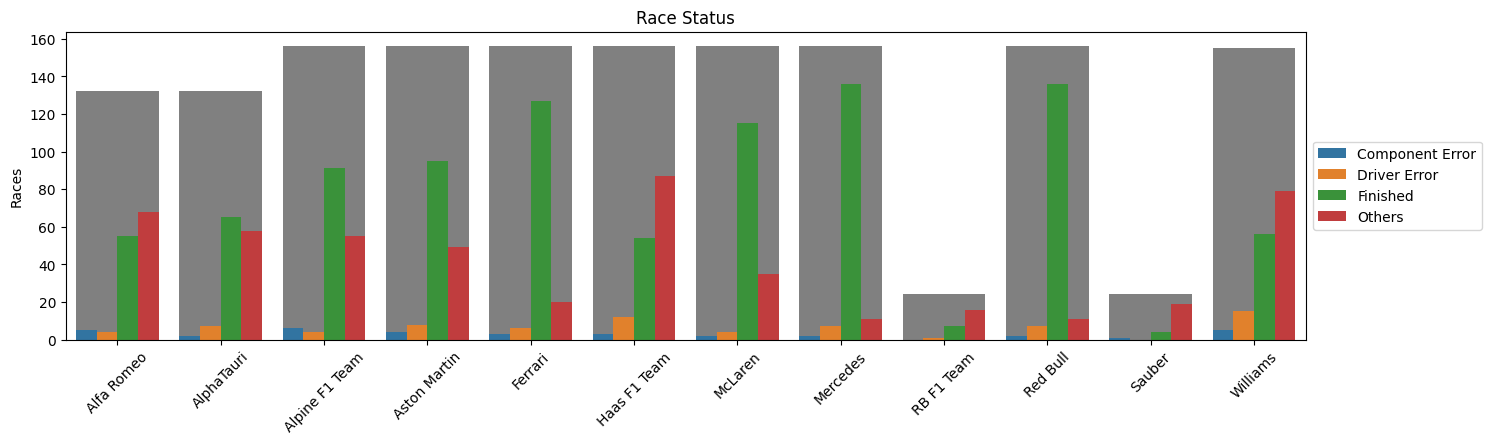

In [10]:
plt.figure(figsize=(16, 4))

sns.barplot(data=status_counts, x='constructor', y='total_races', color='grey')
sns.barplot(data=status_counts, x='constructor', y='status_count', hue='status_simple',)

plt.title('Race Status')
plt.xlabel('')
plt.ylabel('Races')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

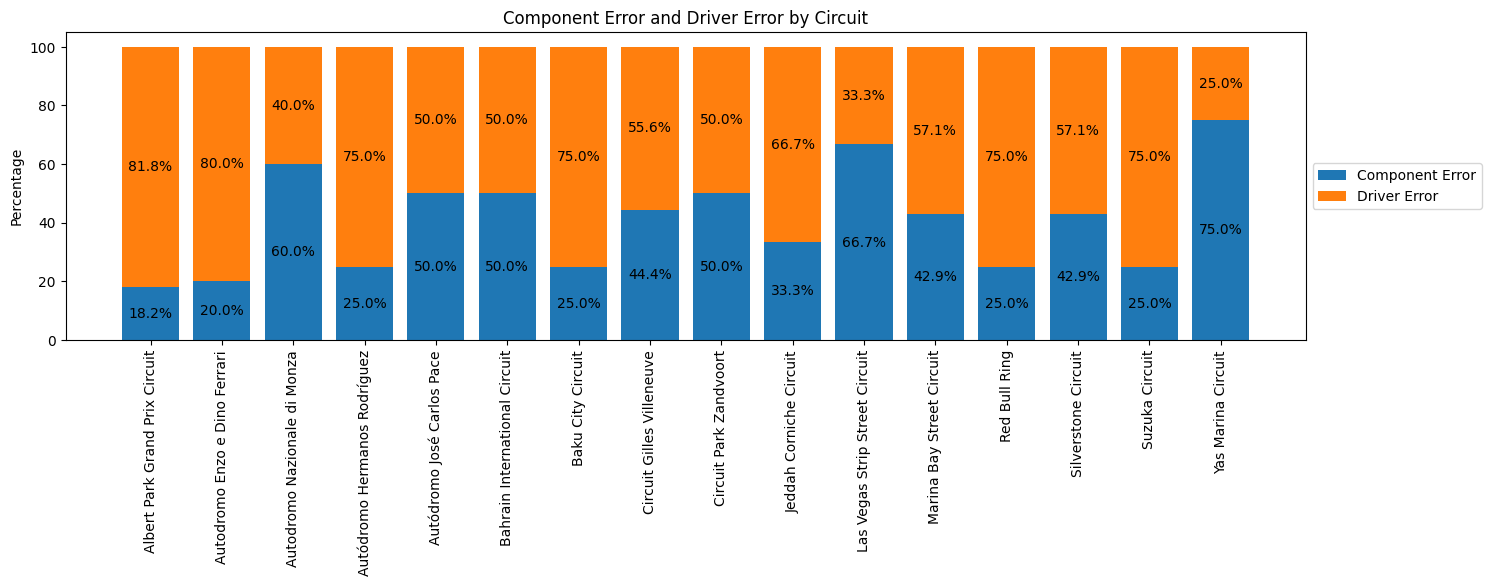

In [11]:
status_counts = race_base[race_base['status_simple'] \
    .isin(['Component Error', 'Driver Error'])] \
    .groupby(['circuit_name', 'status_simple']).size().unstack().reset_index()

status_counts.dropna(subset=['Component Error','Driver Error'], inplace=True)

status_counts['Total'] = status_counts['Component Error'] + status_counts['Driver Error']
status_counts['Component Error'] = status_counts['Component Error'] / status_counts['Total'] * 100
status_counts['Driver Error'] = status_counts['Driver Error'] / status_counts['Total'] * 100

plt.figure(figsize=(16, 4))
bars1 = plt.bar(status_counts['circuit_name'], status_counts['Component Error'], label='Component Error')
bars2 = plt.bar(status_counts['circuit_name'], status_counts['Driver Error'], bottom=status_counts['Component Error'], label='Driver Error')

plt.title('Component Error and Driver Error by Circuit')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for b1, b2 in zip(bars1, bars2):
    height1 = b1.get_height()
    height2 = b2.get_height()
    plt.annotate(f'{height1:.1f}%', xy=(b1.get_x() + b1.get_width() / 2, height1 / 2), ha='center', va='center')
    plt.annotate(f'{height2:.1f}%', xy=(b2.get_x() + b2.get_width() / 2, height1 + height2 / 2), ha='center', va='center')

plt.show()

# Race & Pit Stop Analysis

In [12]:
try:
    lap_times.rename(columns={'time':'lap_time','milliseconds':'lap_milliseconds'}, inplace=True)
    pit_stops.rename(columns={'duration':'stop_time','milliseconds':'stop_milliseconds'}, inplace=True)
    pit_stops.drop('time', axis=1, inplace=True)
except: pass

lap_base = pd.merge(lap_times, pit_stops, on=['raceId','driverId','lap'], how='left')
team_pitstop = pd.merge(races[['raceId','race_name']], pit_stops[['raceId','driverId','stop','stop_milliseconds']], on='raceId', how='inner')
team_pitstop = pd.merge(team_pitstop, drivers[['driverId','fullname']], on='driverId', how='left')
team_pitstop = pd.merge(team_pitstop, result_base[['raceId','driverId','constructorId','constructor']], on=['raceId','driverId'], how='left')
team_pitstop['seconds'] = team_pitstop['stop_milliseconds'] / 1000

In [13]:
avg_pitstop = team_pitstop[['raceId','constructor','seconds']].copy()
avg_pitstop = avg_pitstop.sort_values('constructor')
fig = px.box(avg_pitstop, x='constructor', y='seconds', color='constructor', color_discrete_map=team_color, points='outliers')
fig.update_yaxes(range=[0, 70])
fig.show()

In [14]:
display(race_base[race_base['race_name'].str.contains('Spanish Grand Prix') & (race_base['year'] == 2024)].head(3))

,raceId,year,round,circuitId,race_name,date,circuit_name,driverId,constructorId,points,rank,laps,fastestLapTime,fastestLapSpeed,constructor,status,status_simple
1499,1130,2024,10,4,Spanish Grand Prix,2024-06-23,Circuit de Barcelona-Catalunya,830.0,9.0,25.0,2,66.0,1:17.776,215.557,Red Bull,Finished,Finished
1500,1130,2024,10,4,Spanish Grand Prix,2024-06-23,Circuit de Barcelona-Catalunya,846.0,1.0,19.0,1,66.0,1:17.115,217.405,McLaren,Finished,Finished
1501,1130,2024,10,4,Spanish Grand Prix,2024-06-23,Circuit de Barcelona-Catalunya,1.0,131.0,15.0,4,66.0,1:17.809,215.466,Mercedes,Finished,Finished


In [15]:
race_lap_base = pd.merge(lap_base, race_base[['raceId','driverId','constructorId','constructor','rank','circuit_name']], on=['raceId','driverId'])
race_lap_base = pd.merge(race_lap_base, drivers[['driverId','fullname']], on='driverId')
avg_circuit_pitstop = race_lap_base.groupby('circuit_name')['stop_milliseconds'].mean() / 1000
avg_circuit_pitstop = avg_circuit_pitstop.reset_index()
avg_circuit_pitstop = avg_circuit_pitstop[avg_circuit_pitstop['stop_milliseconds'] <= 50]
fig = px.bar(
    avg_circuit_pitstop
    , x='circuit_name'
    , y='stop_milliseconds'
    , title=f'Average Pit Stop Time on each Circuit since {year_filter}'
    , labels={'circuit_name': 'Circuit', 'stop_milliseconds': 'Average Pit Stop Time (Seconds)'}
    , text=avg_circuit_pitstop['stop_milliseconds'].apply(lambda x: round(x, 2))
)
fig.update_yaxes(range=[0, 50])
fig.show()

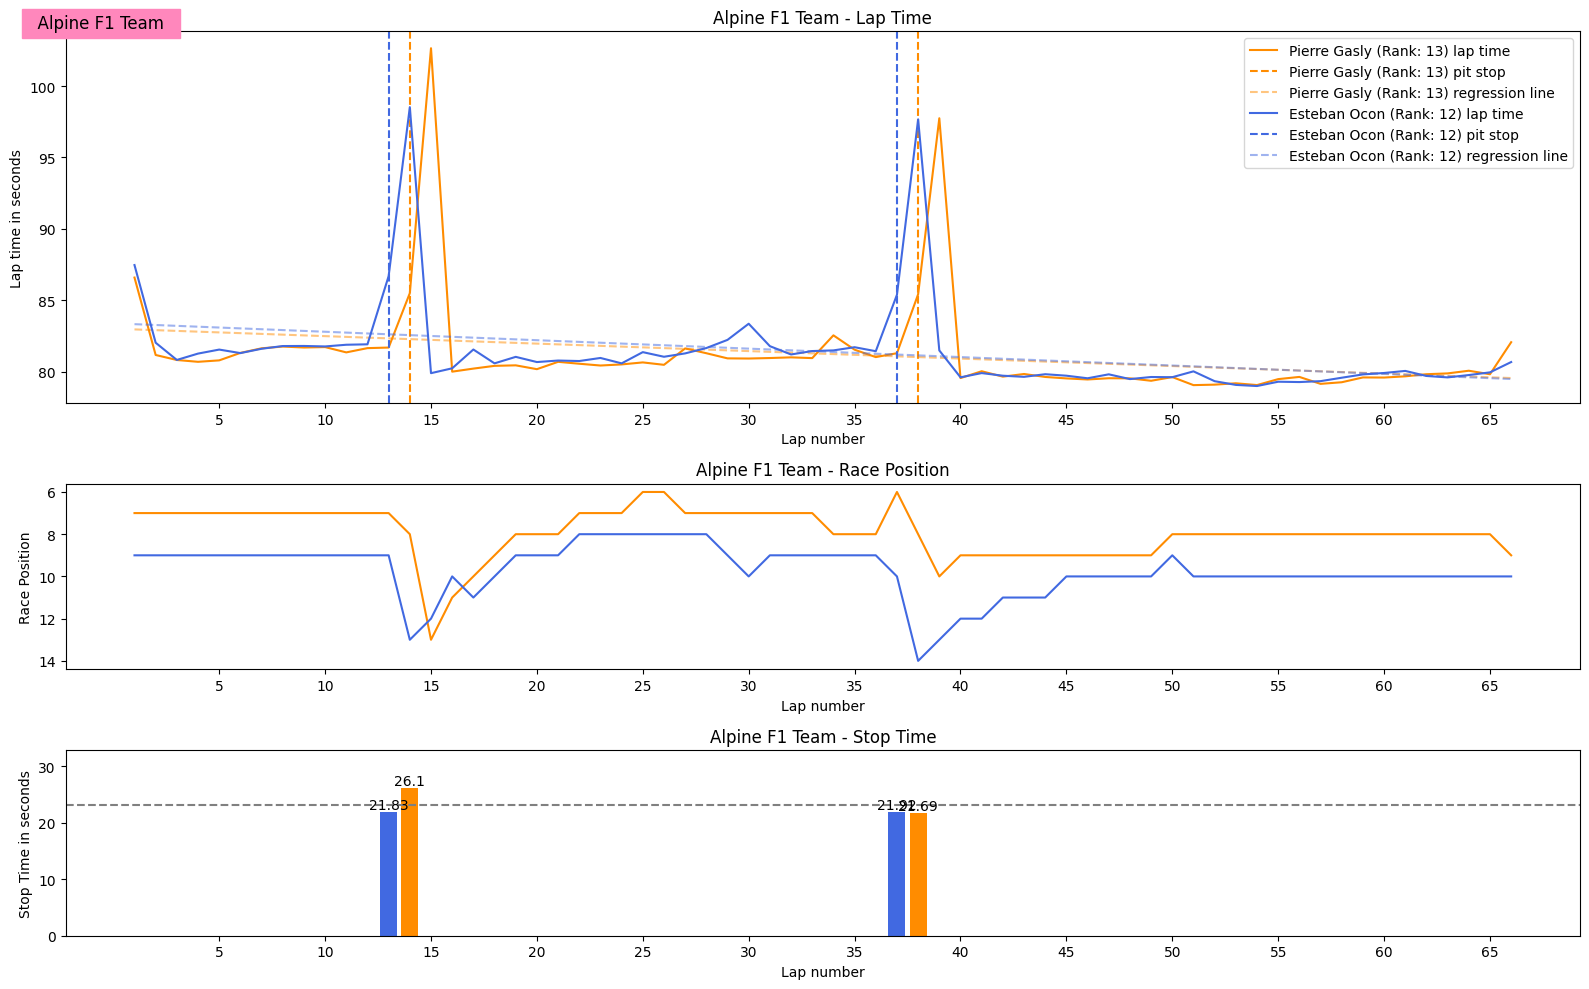

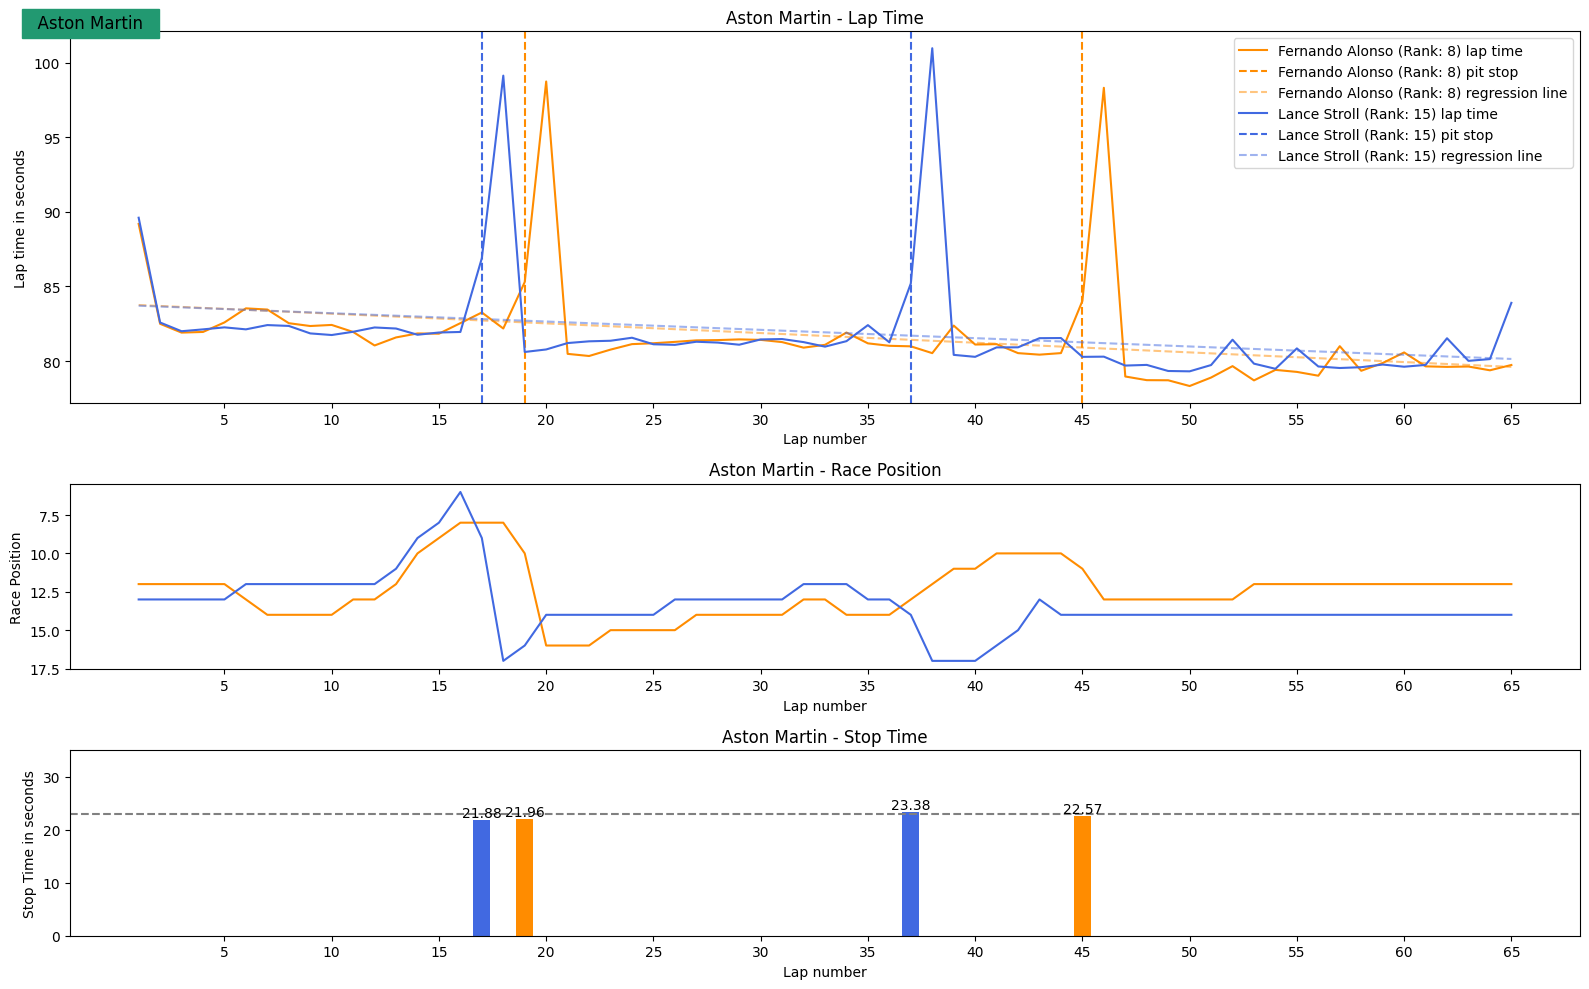

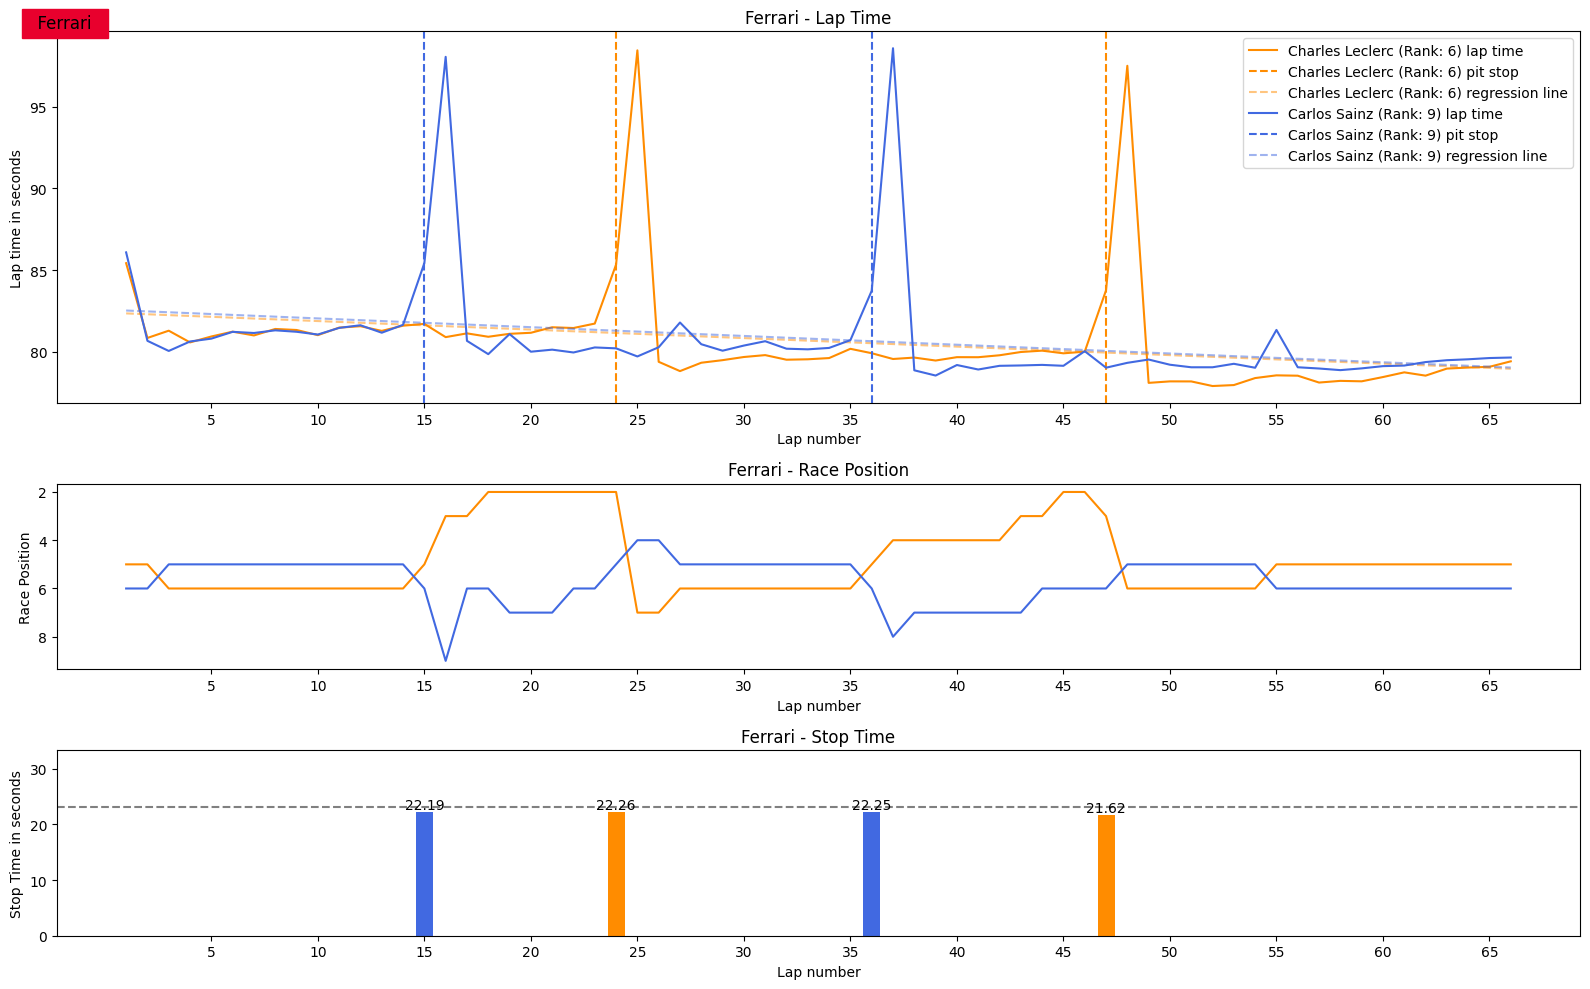

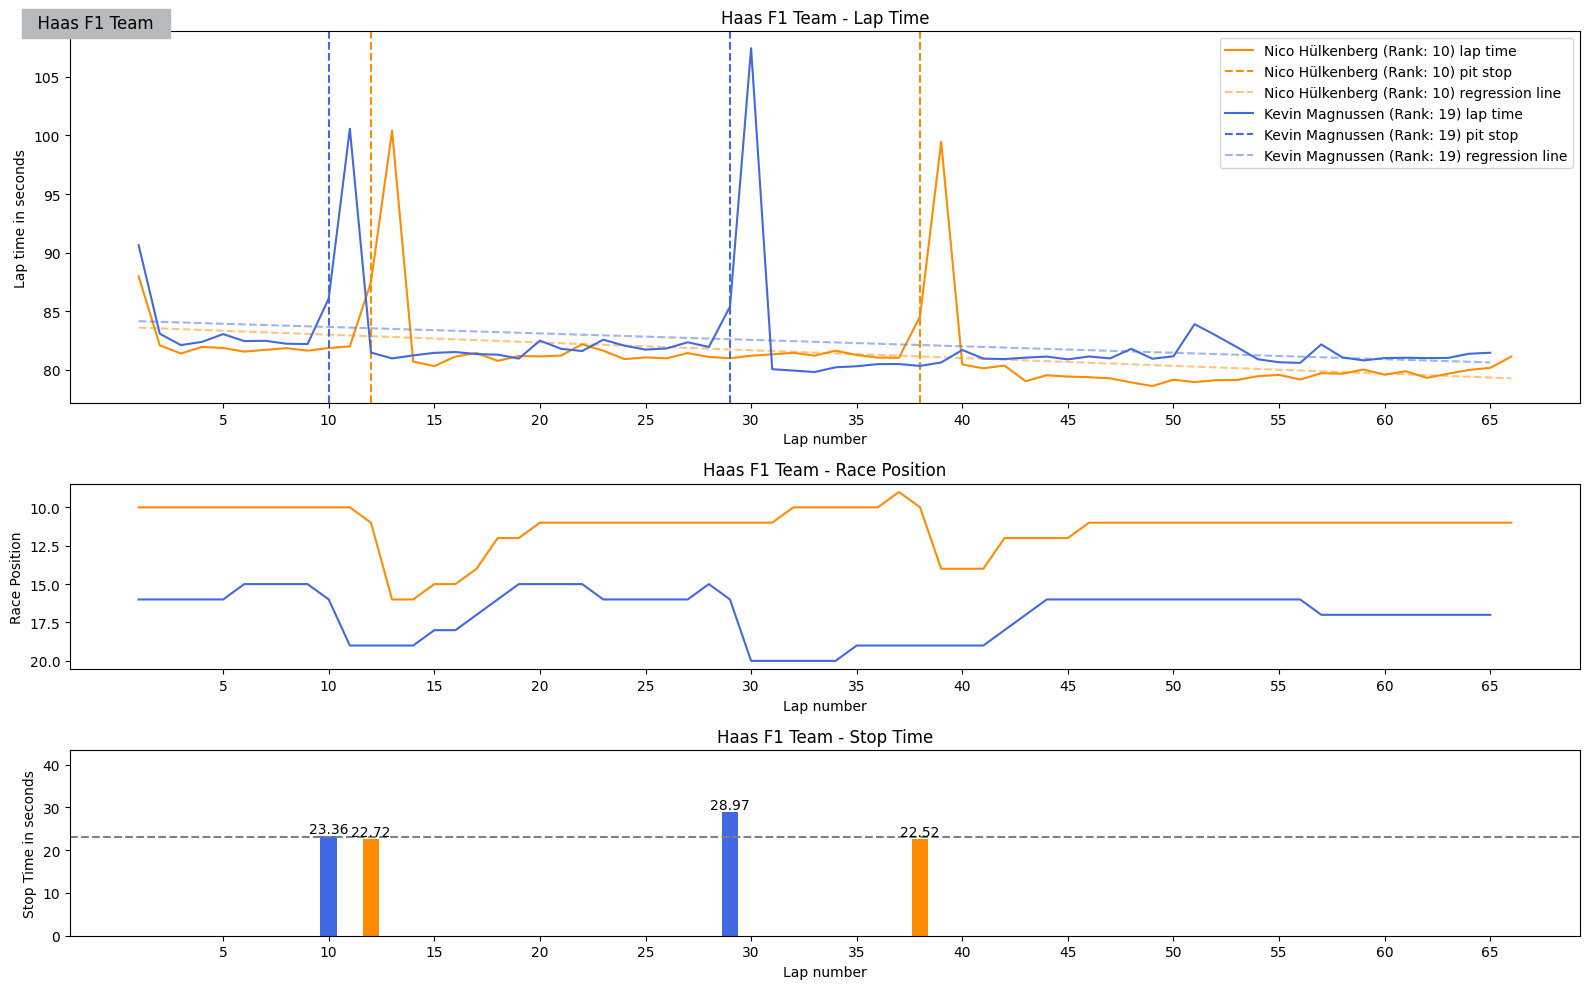

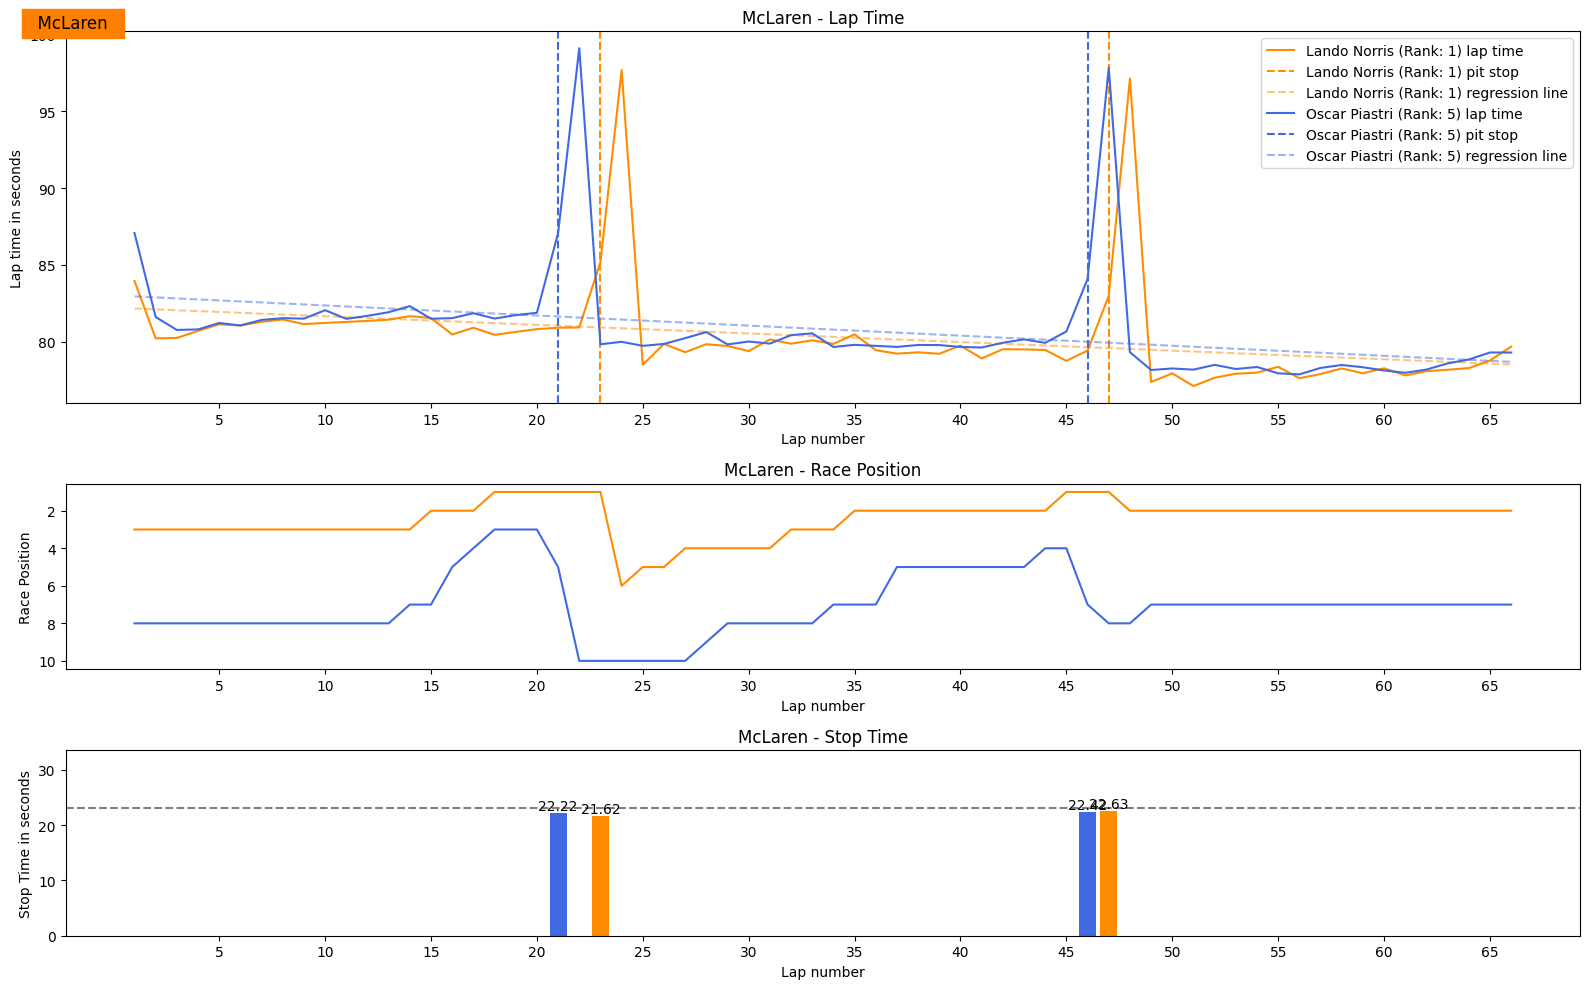

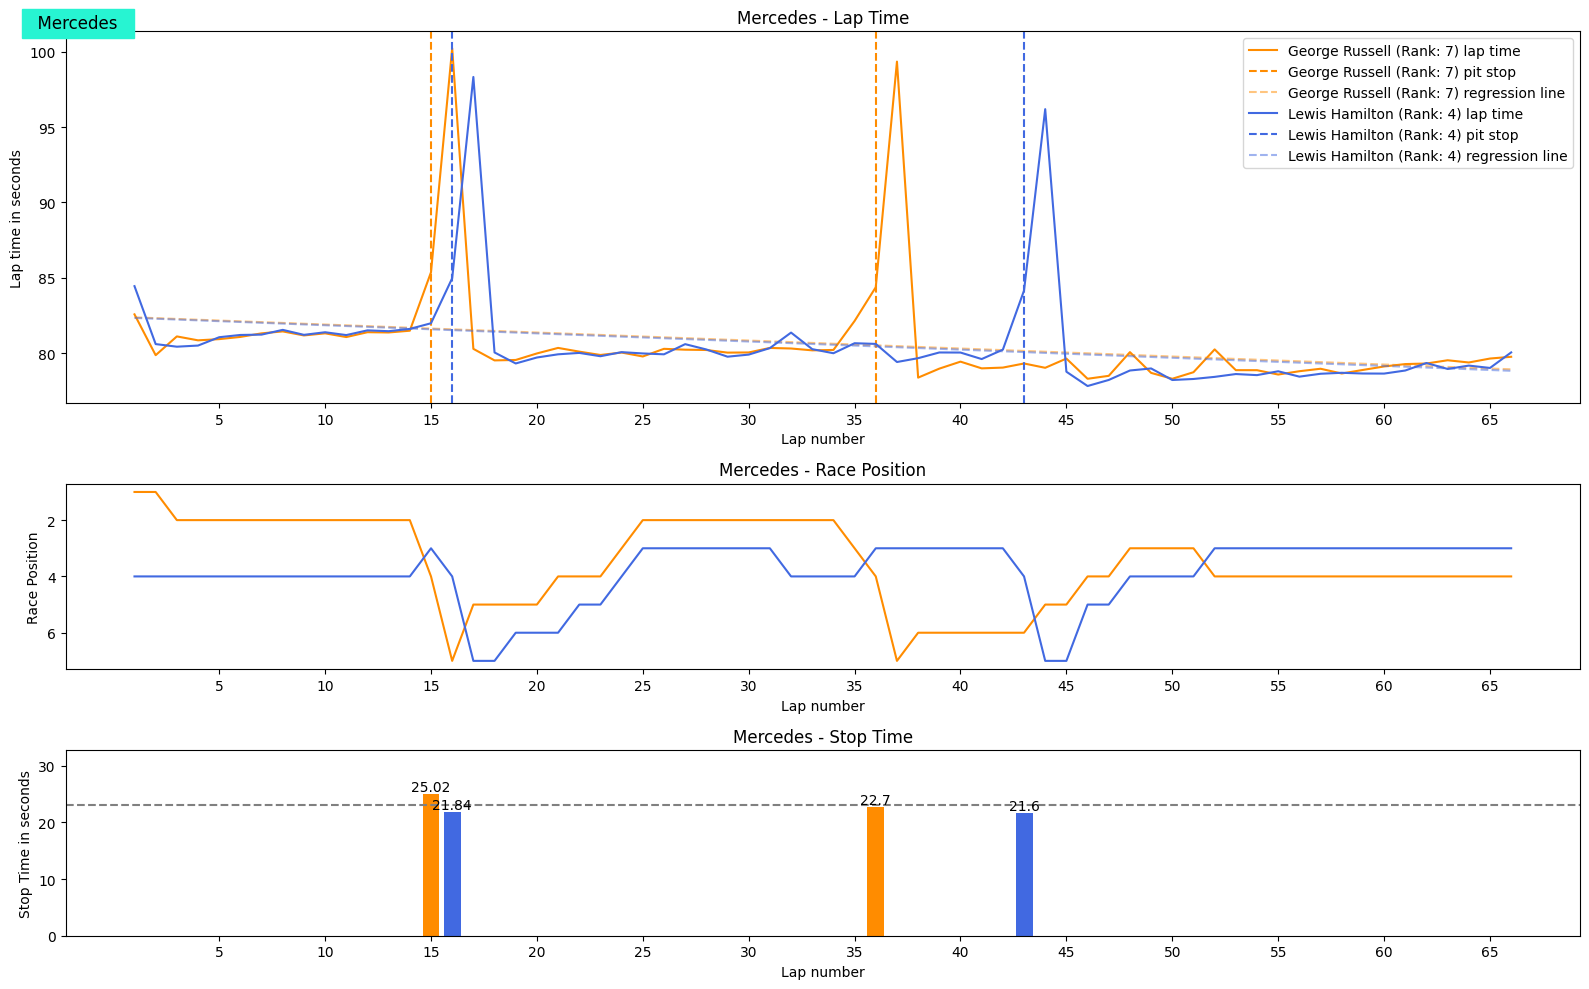

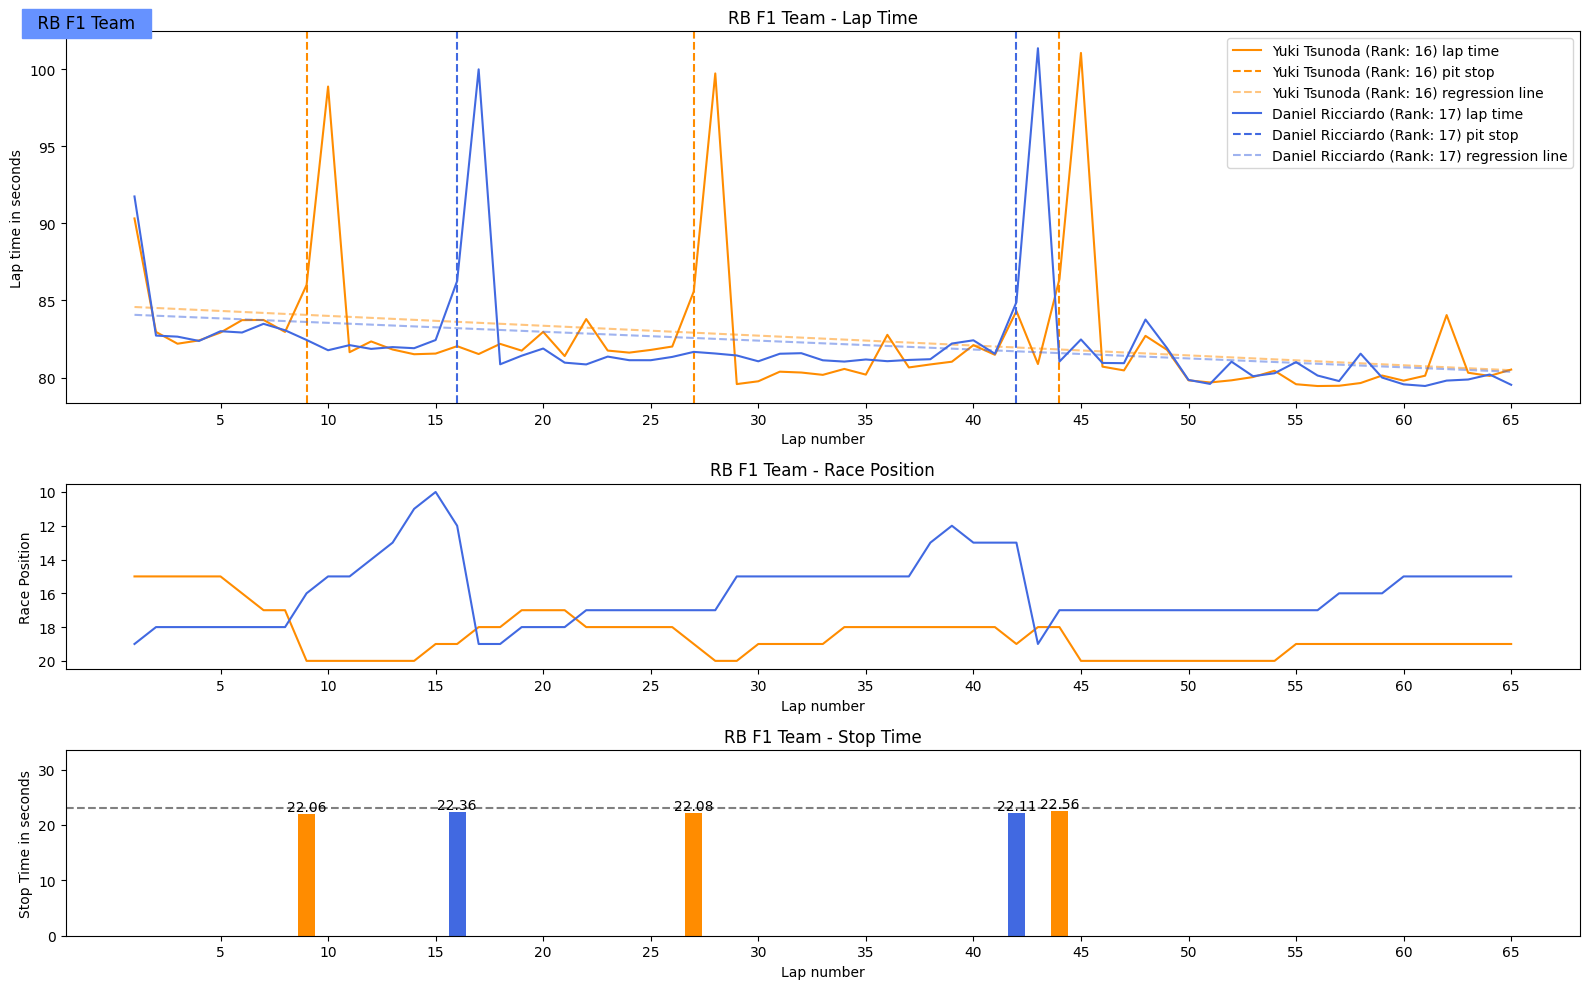

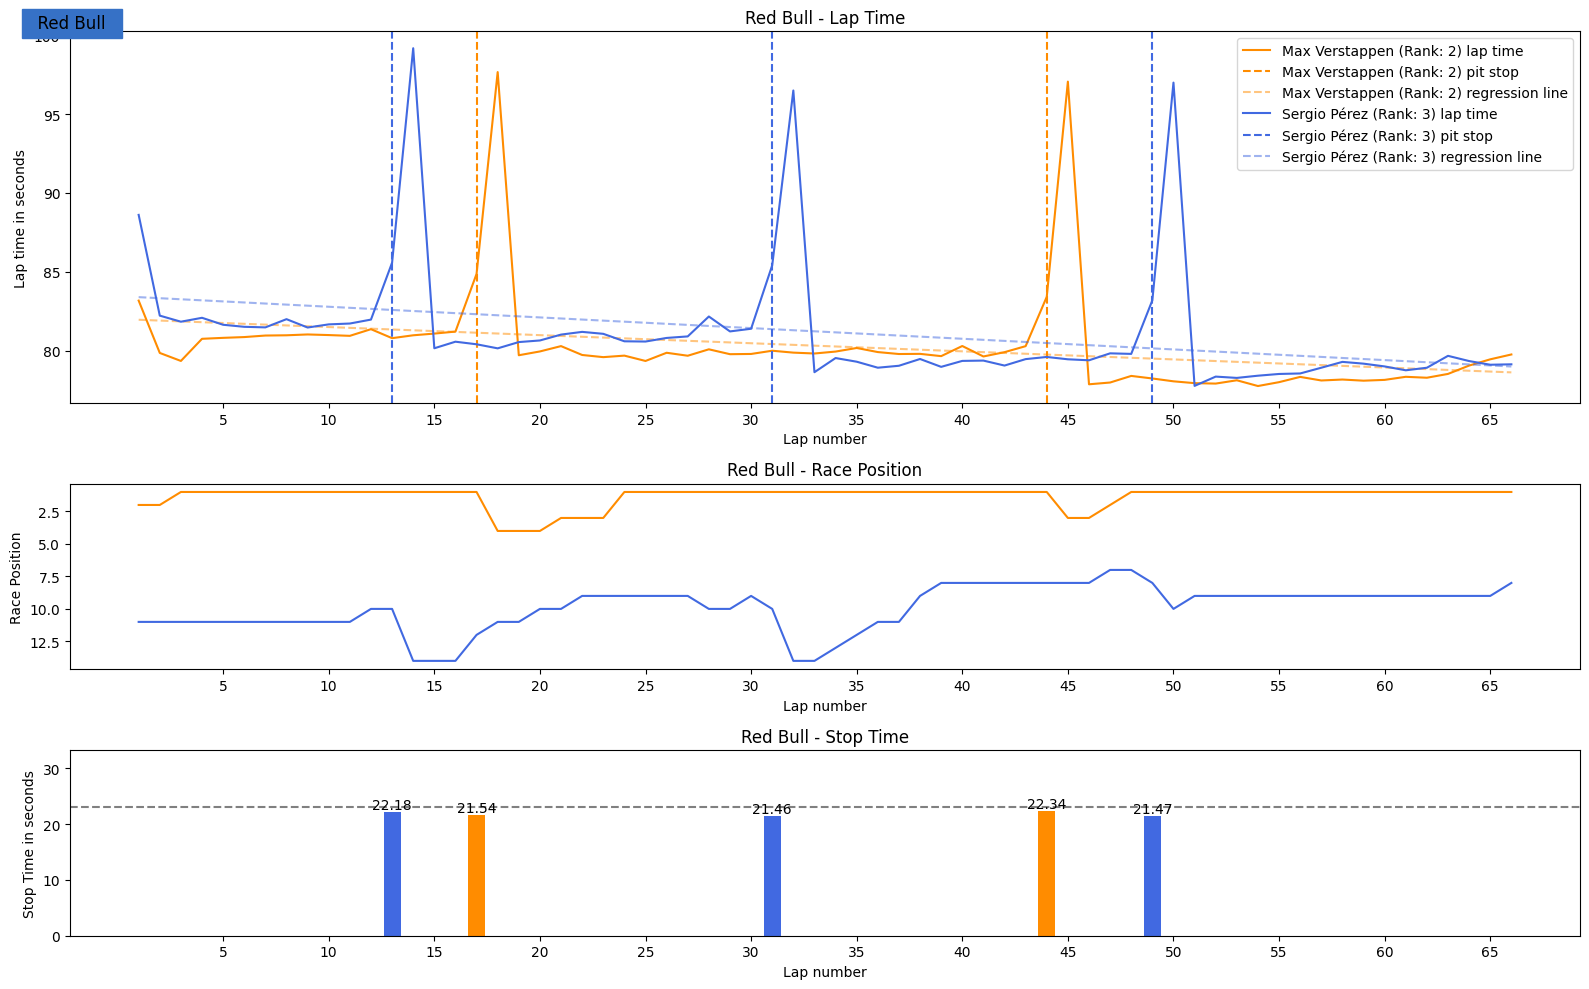

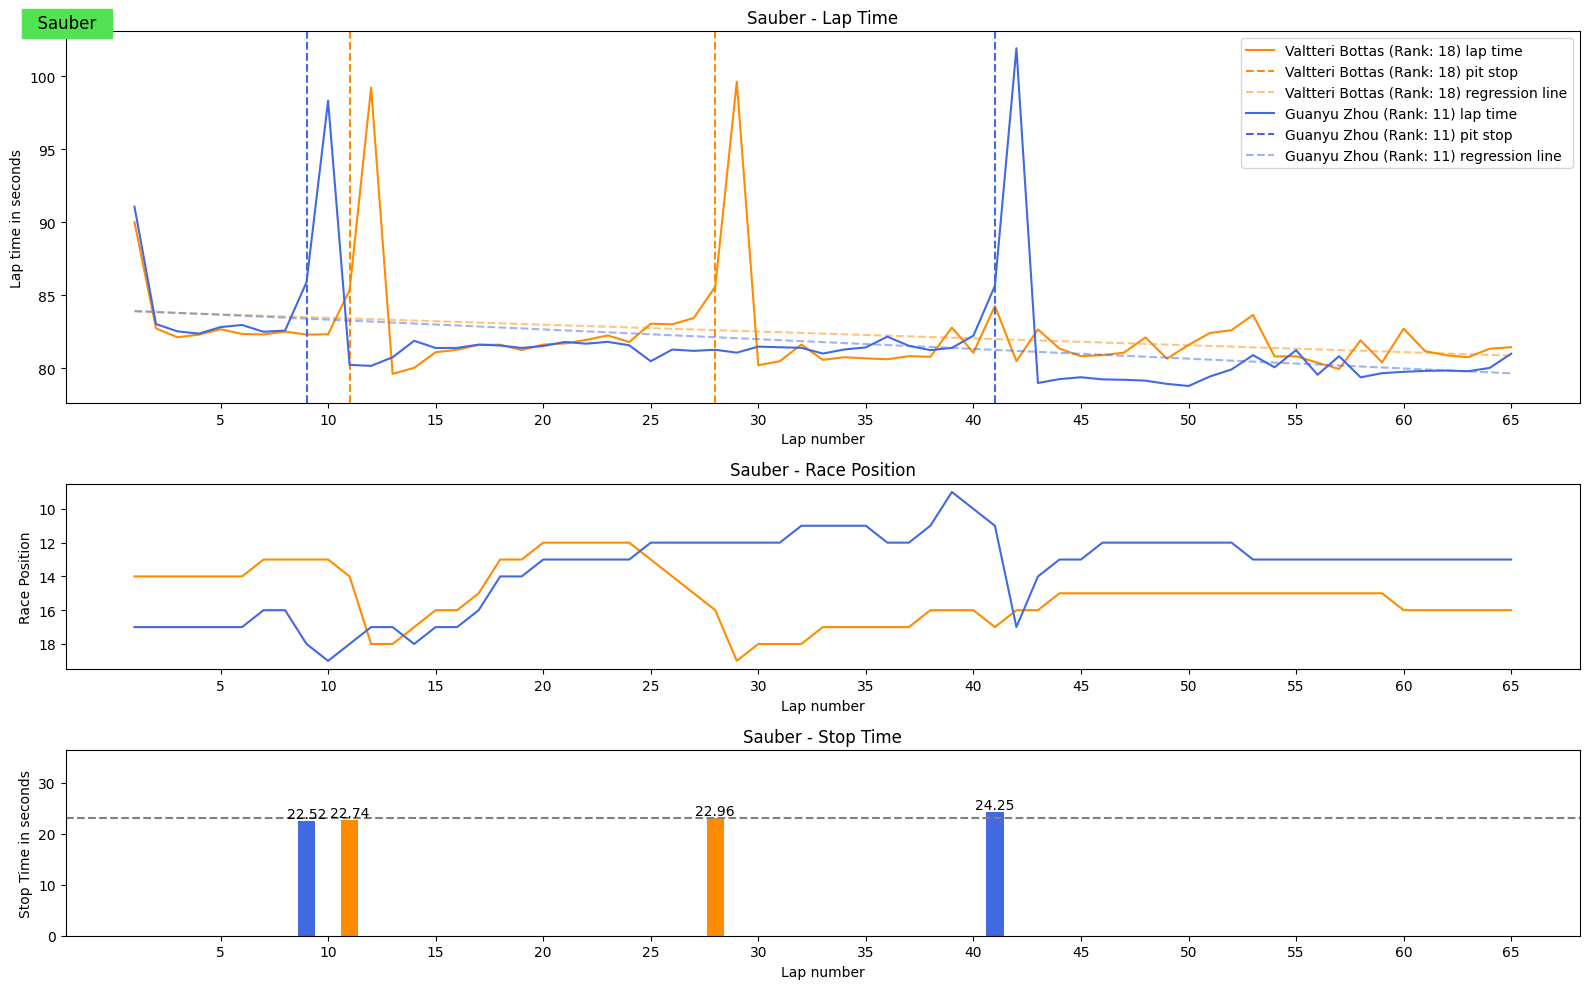

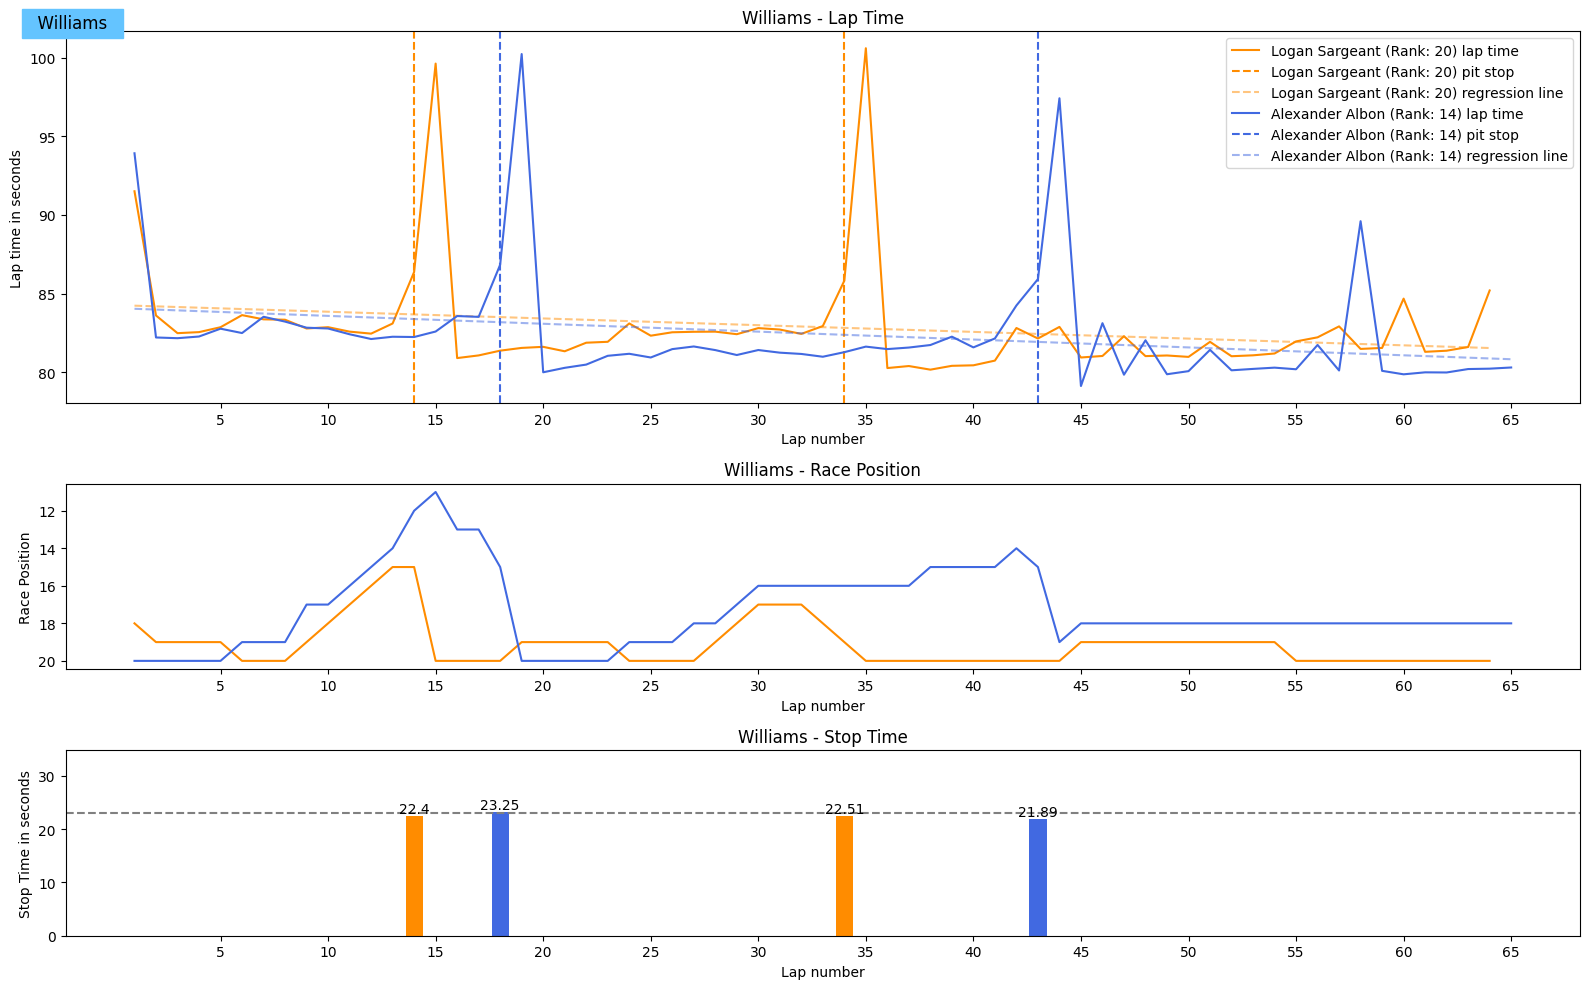

In [16]:
circuit_avg = 23.05 #hard-coded
race_data = race_lap_base[race_lap_base['raceId'] == 1130]
constructors = sorted(race_data['constructor'].unique())
driver_colors = {1: 'darkorange', 2: 'royalblue'}

for constructor in constructors:
    constructor_data = race_data[race_data['constructor'] == constructor]
    driver_ids = constructor_data['driverId'].unique()
    fig, axs = plt.subplots(3, figsize=(16,10), gridspec_kw={'height_ratios': [2, 1, 1]})
    constructor_color = team_color[constructor]
    fig.text(0.02, 0.98, f'  {constructor}  ', fontsize=12, ha='left', va='top', backgroundcolor=constructor_color)

    # Chart 1
    axs[0].set_xlabel('Lap number')
    axs[0].set_ylabel('Lap time in seconds')
    for i, driver_id in enumerate(driver_ids):
        driver_data = constructor_data[constructor_data['driverId'] == driver_id]
        driver_name = driver_data['fullname'].iloc[0]
        driver_rank = driver_data['rank'].iloc[0]
        axs[0].plot(driver_data['lap'], driver_data['lap_milliseconds'] / 1000, color=driver_colors[i+1], label=f'{driver_name} (Rank: {driver_rank}) lap time')
        pit_stop_laps = driver_data[driver_data['stop'] > 0]['lap']
        for lap in pit_stop_laps:
            axs[0].axvline(x=lap, color=driver_colors[i+1], linestyle='--')
        axs[0].plot([], [], color=driver_colors[i+1], linestyle='--', label=f'{driver_name} (Rank: {driver_rank}) pit stop')
        X = driver_data['lap'].values.reshape(-1,1)
        Y = driver_data['lap_milliseconds'].values.reshape(-1,1) / 1000
        regression = LinearRegression().fit(X, Y)
        axs[0].plot(X, regression.predict(X), color=driver_colors[i+1], linestyle='dashed', alpha=0.5, label=f'{driver_name} (Rank: {driver_rank}) regression line')

    axs[0].set_title(f'{constructor} - Lap Time')
    axs[0].legend(loc='upper right')
    axs[0].xaxis.set_ticks(np.arange(5, max(driver_data['lap']) + 1, 5))

    # Chart 2
    axs[1].set_xlabel('Lap number')
    axs[1].set_ylabel('Race Position')
    for i, driver_id in enumerate(driver_ids):
        driver_data = constructor_data[constructor_data['driverId'] == driver_id]
        driver_name = driver_data['fullname'].iloc[0]
        driver_rank = driver_data['rank'].iloc[0]
        axs[1].plot(driver_data['lap'], driver_data['position'], color=driver_colors[i+1])

    axs[1].set_title(f'{constructor} - Race Position')
    axs[1].xaxis.set_ticks(np.arange(5, max(driver_data['lap']) + 1, 5))
    axs[1].invert_yaxis()

    # Chart 3
    axs[2].set_xlabel('Lap number')
    axs[2].set_ylabel('Stop Time in seconds')
    for i, driver_id in enumerate(driver_ids):
        driver_data = constructor_data[constructor_data['driverId'] == driver_id]
        driver_name = driver_data['fullname'].iloc[0]
        driver_rank = driver_data['rank'].iloc[0]
        stop_data = driver_data[driver_data['stop'] > 0]
        bars = axs[2].bar(stop_data['lap'], stop_data['stop_milliseconds'] / 1000, color=driver_colors[i+1])
        for bar in bars:
            yval = bar.get_height()
            axs[2].text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    axs[2].axhline(y=circuit_avg, color='grey', linestyle='--')
    axs[2].set_ylim(0, max(stop_data['stop_milliseconds'] / 1000) * 1.5)
    axs[2].set_xlim(axs[0].get_xlim())
    axs[2].set_title(f'{constructor} - Stop Time')
    axs[2].xaxis.set_ticks(np.arange(5, max(driver_data['lap']) + 1, 5))

    plt.tight_layout()
    plt.show()